**1.	Data Cleaning and Preparation:**

*●	Load the dataset into a DataFrame or equivalent data structure.*

*●	Handle missing values appropriately (e.g., imputation, deletion).*

*●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).*

*●	Detect and treat outliers if necessary.*


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Cardiotocographic.csv')

# Step 1: Data Cleaning and Preparation
# Handle missing values
df.fillna(method='ffill', inplace=True)
# Correct data types
df['LB'] = pd.to_numeric(df['LB'], errors='coerce')  # Convert to numeric type if needed
# Detect and handle outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\dhivya.dharani\AppData\Local\Temp\ipykernel_29376\3012391912.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


**2. Statistical Summary:**

*Summary Statistics: Use describe() to generate mean, median, standard deviation, and interquartile range for each variable.*

*Interesting Findings: Highlight anything unusual, such as skewed distributions or unexpected variability in some variables.*

In [4]:
summary_stats = df.describe()
print(summary_stats)

               LB          AC          FM          UC          DL     DS  \
count  893.000000  893.000000  893.000000  893.000000  893.000000  893.0   
mean   131.841314    0.004106    0.000606    0.004964    0.001549    0.0   
std      9.421251    0.003753    0.001344    0.002711    0.002216    0.0   
min    106.000000   -0.000122   -0.002467   -0.000101   -0.000124    0.0   
25%    125.000000    0.000004    0.000000    0.003140    0.000000    0.0   
50%    133.000000    0.003358    0.000000    0.005051    0.000000    0.0   
75%    138.000000    0.006749    0.000310    0.006928    0.003086    0.0   
max    160.000000    0.014068    0.006272    0.012072    0.008197    0.0   

          DP        ASTV        MSTV        ALTV        MLTV       Width  \
count  893.0  893.000000  893.000000  893.000000  893.000000  893.000000   
mean     0.0   42.406763    1.275106    3.134572    8.588952   67.964873   
std      0.0   15.046100    0.541434    6.011550    4.507419   32.602121   
min      0.

**. Data Visualization:**

*Histograms/Boxplots: Use matplotlib and seaborn to create histograms and boxplots for the distribution of numerical variables.*

*Bar Charts/Pie Charts: Visualize categorical data using countplot (for bar charts) and pie() from matplotlib.*

*Scatter Plots/Correlation Heatmaps: Generate scatter plots to check relationships and a heatmap using seaborn.heatmap() to explore correlations.*

*Advanced Visualizations: Use pair plots (sns.pairplot()) or violin plots for deeper exploration of relationships between variables.*

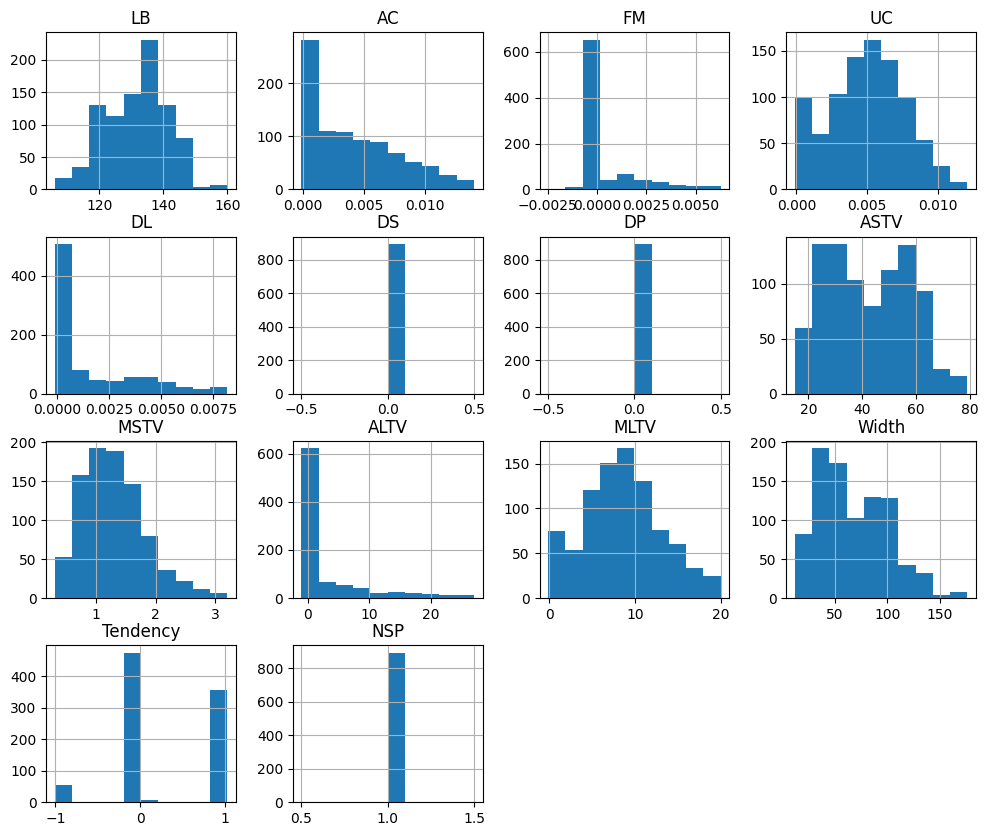

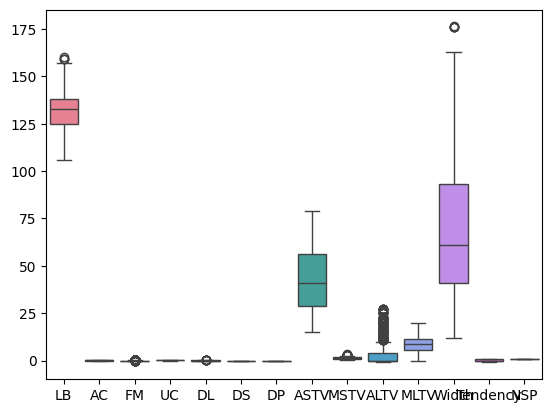

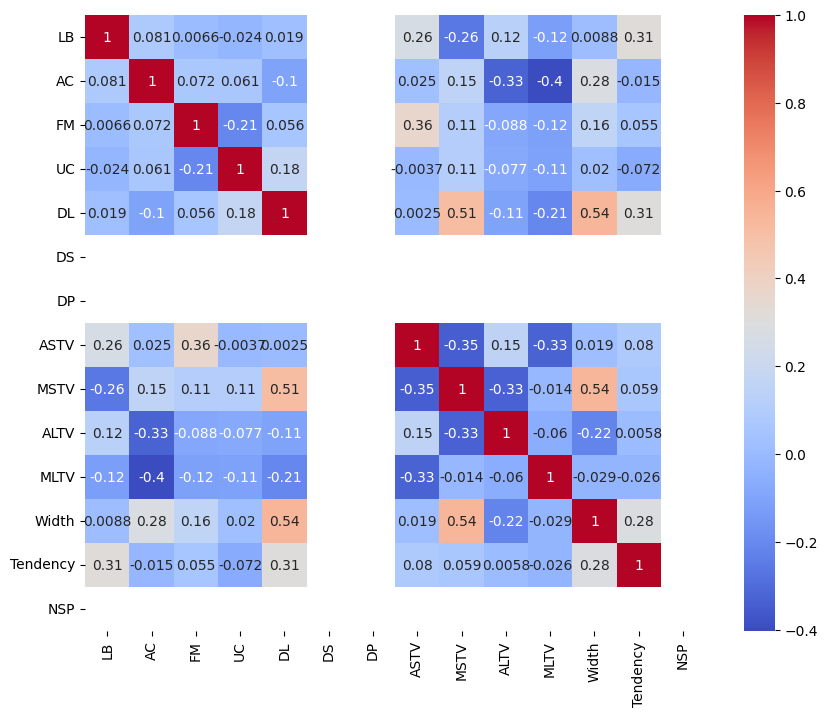

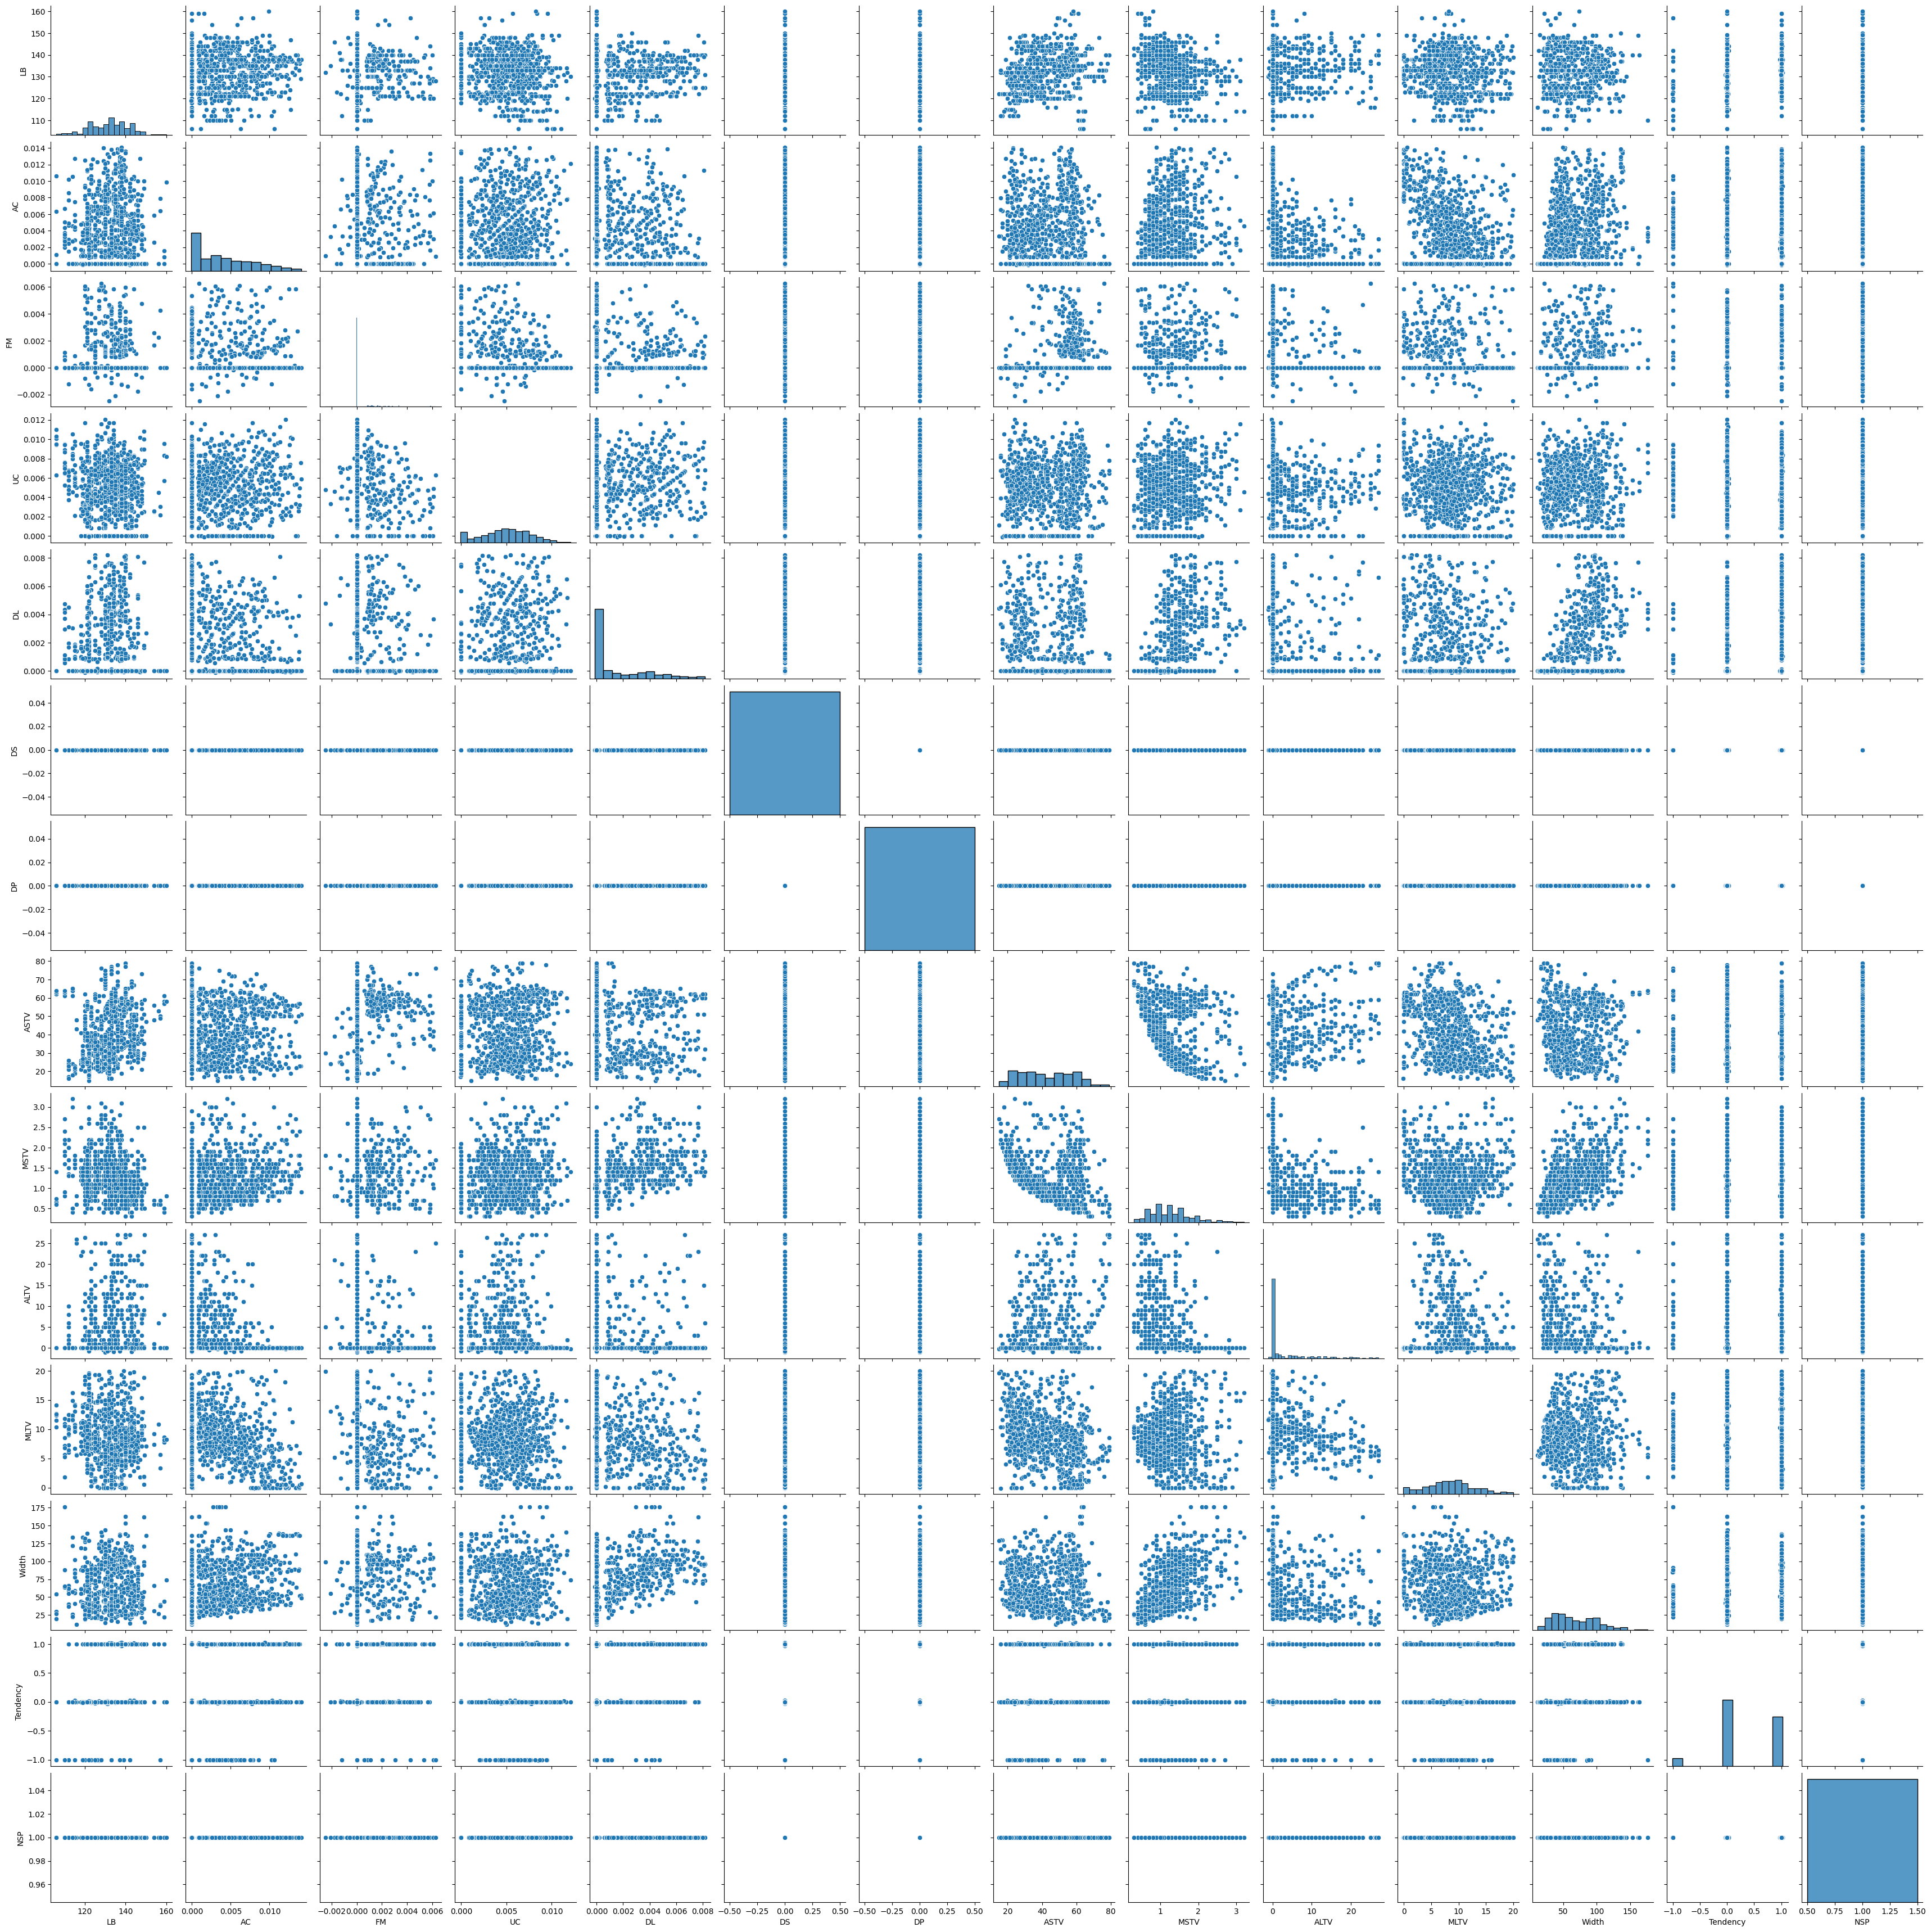

In [5]:
df.hist(figsize=(12, 10))
plt.show()

# Boxplot for outlier detection
sns.boxplot(data=df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Pairplot for deeper analysis
sns.pairplot(df)
plt.show()

**Pattern Recognition and Insights:**

*Correlations: Identify correlations between variables using corr() and discuss implications.*

*Trends Over Time: If the dataset has temporal data, check for trends using time-series analysis.*

In [6]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

                LB        AC        FM        UC        DL  DS  DP      ASTV  \
LB        1.000000  0.081495  0.006587 -0.024478  0.019139 NaN NaN  0.264192   
AC        0.081495  1.000000  0.072085  0.061173 -0.103162 NaN NaN  0.025099   
FM        0.006587  0.072085  1.000000 -0.206169  0.055885 NaN NaN  0.362954   
UC       -0.024478  0.061173 -0.206169  1.000000  0.177172 NaN NaN -0.003724   
DL        0.019139 -0.103162  0.055885  0.177172  1.000000 NaN NaN  0.002496   
DS             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
DP             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
ASTV      0.264192  0.025099  0.362954 -0.003724  0.002496 NaN NaN  1.000000   
MSTV     -0.257972  0.151029  0.109719  0.109765  0.508194 NaN NaN -0.347375   
ALTV      0.124696 -0.328493 -0.087907 -0.076575 -0.106407 NaN NaN  0.145556   
MLTV     -0.121062 -0.402955 -0.117609 -0.107161 -0.210715 NaN NaN -0.331557   
Width     0.008810  0.278917  0.158222  

**1. Positive Correlations:**

*LB (Baseline Fetal Heart Rate) shows a moderate positive correlation with ASTV (Percentage of Time with Abnormal Short Term Variability) with a value of 0.26, and Tendency with a correlation of 0.31. This suggests that as the baseline heart rate increases, there might be a higher percentage of abnormal short-term variability and an upward trend in the tendency.*

*DL (Decelerations Late) shows a strong positive correlation with Width (0.54) and MSTV (0.51). This indicates that late decelerations are strongly related to the width of some factor and short-term variability in the fetal heart rate.*

*AC (Accelerations) has a moderate positive correlation with Width (0.28), indicating that accelerations are somewhat associated with width.*

**2. Negative Correlations:**

*AC (Accelerations) has a moderate negative correlation with MLTV (Mean Value of Long Term Variability) (-0.40), indicating that higher accelerations correspond to lower long-term variability.*

*MSTV (Mean Short-Term Variability) is negatively correlated with ASTV (-0.35), suggesting that higher short-term variability is associated with a lower percentage of time with abnormal short-term variability.*

*ALTV (Abnormal Long-Term Variability) is negatively correlated with AC (-0.33) and MLTV (-0.33), indicating that higher accelerations or long-term variability result in less abnormal long-term variability.*

**3. Low or No Correlation:**

*FM (Fetal Movements) and UC (Uterine Contractions) do not exhibit significant correlations with many other variables, with correlations close to zero, suggesting weak or no linear relationships with the other parameters.*

*LB has a near-zero correlation with Width (0.01), indicating no substantial relationship between the baseline heart rate and width.*

**4. Missing Data:**

*There are missing values for variables such as DS (Decelerations Short) and DP (Decelerations Prolonged). The missing correlations for these variables indicate a lack of complete data or inconsistency, which needs to be addressed during the analysis process (e.g., through imputation or exclusion).*